# Clean and filter the User Dataset

import numpy
import pandas
import sklearn

print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

1.26.4
2.1.4
1.3.2

In [1]:
import pandas as pd

# load the user dataset and select the users in singapore
user = pd.read_csv('dataset/user/survey_results_public.csv',low_memory=False)
user = user[user['Country'] == 'Singapore']
print(user.shape)
user.head(5)

C:\Users\chiti\AppData\Local\Temp\ipykernel_38516\3493511830.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


(376, 129)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
398,569,Yes,No,Singapore,No,Employed full-time,"Other doctoral degree (Ph.D, Ed.D., etc.)","Another engineering discipline (ex. civil, ele...","5,000 to 9,999 employees",Data scientist or machine learning specialist;...,...,1 - 2 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,25 - 34 years old,No,NaN,The survey was an appropriate length,Very easy
808,1142,Yes,Yes,Singapore,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","1,000 to 4,999 employees",Back-end developer;Front-end developer;Full-st...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1345,1886,Yes,No,Singapore,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer;Desktop or enterprise appli...,...,I don't typically exercise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1578,2208,No,No,Singapore,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Information systems, information technology, o...",Fewer than 10 employees,Back-end developer;Front-end developer;Full-st...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2321,3285,Yes,No,Singapore,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","1,000 to 4,999 employees",Back-end developer;Front-end developer;Full-st...,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,South Asian,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [5]:
# print the columns with more than 100 NULL values
col_rem = user.columns[user.isnull().sum() > 100]
print(len(col_rem))
for i in range(len(col_rem)):
    #print(col_rem[i])
    print("")
# remove the unrelated columns from the column list

colname_list = [
"HypotheticalTools1",
"HypotheticalTools2",
"HypotheticalTools3",
"HypotheticalTools4",
"HypotheticalTools5",
"AssessJob1",
"AssessJob2",
"AssessJob3",
"AssessJob4",
"AssessJob5",
"AssessJob6",
"AssessJob7",
"AssessJob8",
"AssessJob9",
"AssessJob10",
"AssessBenefits1",
"AssessBenefits2",
"AssessBenefits3",
"AssessBenefits4",
"AssessBenefits5",
"AssessBenefits6",
"AssessBenefits7",
"AssessBenefits8",
"AssessBenefits9",
"AssessBenefits10",
"JobContactPriorities1",
"JobContactPriorities2",
"JobContactPriorities3",
"JobContactPriorities4",
"JobContactPriorities5",
"JobEmailPriorities1",
"JobEmailPriorities2",
"JobEmailPriorities3",
"JobEmailPriorities4",
"JobEmailPriorities5",
"JobEmailPriorities6",
"JobEmailPriorities7",
"HopeFiveYears",
"JobSatisfaction",  #
"CareerSatisfaction",
"UpdateCV",
"Currency",
"SalaryType",
"ConvertedSalary",
"CurrencySymbol",
"CommunicationTools",
"TimeFullyProductive",
"EducationTypes",
"SelfTaughtTypes",
"TimeAfterBootcamp",
"HackathonReasons",
"AgreeDisagree1",
"AgreeDisagree2",
"AgreeDisagree3",
"LanguageDesireNextYear",
"DatabaseDesireNextYear",
"PlatformDesireNextYear",
"FrameworkDesireNextYear",
"Methodology",
"VersionControl",
"CheckInCode",
"AdBlockerDisable",
"AdBlockerReasons",
"AdsAgreeDisagree1",
"AdsAgreeDisagree3",
"AdsActions",
"AdsPriorities1",
"AdsPriorities2",
"AdsPriorities3",
"AdsPriorities4",
"AdsPriorities5",
"AdsPriorities6",
"AdsPriorities7",
"AIDangerous",
"AIInteresting",
"AIResponsible",
"AIFuture",
"EthicsChoice",
"EthicsReport",
"EthicsResponsible",
"EthicalImplications",
"HypotheticalTools1",
"HypotheticalTools2",
"HypotheticalTools3",
"HypotheticalTools4",
"HypotheticalTools5",
"WakeTime",            # personal info below
"HoursComputer",
"HoursOutside",
"SkipMeals",
"ErgonomicDevices",
"Exercise",
"Gender",
"SexualOrientation",
"EducationParents",
"RaceEthnicity",
"Age",          # decide later
"Dependents",
"MilitaryUS",
"SurveyTooLong",
"SurveyEasy"
]
"""# for stackoverflow
StackOverflowParticipate
StackOverflowDevStory
StackOverflowJobsRecommend
"""
unrelated_cols = []
for col in colname_list:
    unrelated_cols.append(col)
print(unrelated_cols)

105









































































































['HypotheticalTools1', 'HypotheticalTools2', 'HypotheticalTools3', 'HypotheticalTools4', 'HypotheticalTools5', 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'JobContactPriorities1', 'JobContactPriorities2', 'JobContactPriorities3', 'JobContactPriorities4', 'JobContactPriorities5', 'JobEmailPriorities1', 'JobEmailPriorities2', 'JobEmailPriorities3', 'JobEmailPriorities4', 'JobEmailPriorities5', 'JobEmailPriorities6', 'JobEmailPriorities7', 'HopeFiveYears', 'JobSatisfaction', 'CareerSatisfaction', 'UpdateCV', 'Currency', 'SalaryType', 'ConvertedSalary', 'CurrencySymbol', 'CommunicationTools', 'TimeFu

In [6]:
user_clean = user.drop(columns=unrelated_cols,axis=1)
print(user_clean.shape)
user_clean.to_csv('dataset/user/user_clean.csv',index=False)

(376, 33)


In [8]:
user_clean.head(5)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,AdBlocker,AdsAgreeDisagree2,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember
398,569,Yes,No,Singapore,No,Employed full-time,"Other doctoral degree (Ph.D, Ed.D., etc.)","Another engineering discipline (ex. civil, ele...","5,000 to 9,999 employees",Data scientist or machine learning specialist;...,...,Yes,Strongly agree,10 (Very Likely),Daily or almost daily,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a jobs boar...","No, and I don't know what that is",NaN,Yes
808,1142,Yes,Yes,Singapore,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","1,000 to 4,999 employees",Back-end developer;Front-end developer;Full-st...,...,Yes,Somewhat disagree,8,A few times per month or weekly,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a jobs boar...","No, I know what it is but I don't have one",NaN,I'm not sure
1345,1886,Yes,No,Singapore,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer;Desktop or enterprise appli...,...,I'm not sure/I don't know,Neither agree nor disagree,7,Multiple times per day,Yes,A few times per week,"No, I knew that Stack Overflow had a jobs boar...","No, I have one but it's out of date",NaN,Yes
1578,2208,No,No,Singapore,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Information systems, information technology, o...",Fewer than 10 employees,Back-end developer;Front-end developer;Full-st...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2321,3285,Yes,No,Singapore,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","1,000 to 4,999 employees",Back-end developer;Front-end developer;Full-st...,...,No,Neither agree nor disagree,10 (Very Likely),Multiple times per day,Yes,Less than once per month or monthly,Yes,"No, and I don't know what that is",5,Yes


Respondent         0
Hobby              0
OpenSource         0
Country            0
Student           13
                ... 
Age              142
Dependents       153
MilitaryUS       376
SurveyTooLong    134
SurveyEasy       134
Length: 129, dtype: int64


<Axes: >

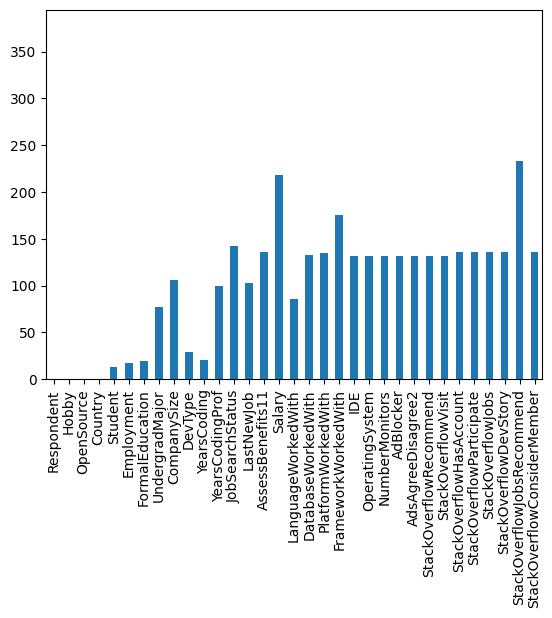

In [10]:
# check the NULL values in the dataset
print(user.isnull().sum())
# plot the graph of the number of Null values in each column
import matplotlib.pyplot as plt
user.isnull().sum().plot(kind='bar')
user.drop(columns=unrelated_cols,axis=1).isnull().sum().plot(kind='bar')


entity list: 所有属性的列表，包含了所有可能的实体，包含了items。(org_id remap_id-数字)
example:ydUqgWsF3F27TbauOyib0w 0

item list：所有职位的列表，包含了所有可能的职位。(org_id remap_id freebase_id) org_id=freespace_id
example:ydUqgWsF3F27TbauOyib0w 0ydUqgWsF3F27TbauOyib0w

user list：所有用户的列表，包含了所有可能的用户。（org_id,remap_id）
example:62GNFh5FySkA3MbrQmnqvg 0

relation list: 所有关系的列表，包含了所有可能的实体对之间的关系。(org_id(字符串) remap_id-数字)
example:attributes::BikeParking 1

train.txt: (user::remap_id,item::remap_id,item::remap_id)

# Process User Dateset and get Skill Sets

In [50]:
# 根据用户数据集中的用户岗位，生成用户-岗位的交互矩阵
import pandas as pd
# load the user dataset
user = pd.read_csv('dataset/user/user_clean.csv',low_memory=False)
user.head(5)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,AdBlocker,AdsAgreeDisagree2,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember
0,569,Yes,No,Singapore,No,Employed full-time,"Other doctoral degree (Ph.D, Ed.D., etc.)","Another engineering discipline (ex. civil, ele...","5,000 to 9,999 employees",Data scientist or machine learning specialist;...,...,Yes,Strongly agree,10 (Very Likely),Daily or almost daily,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a jobs boar...","No, and I don't know what that is",NaN,Yes
1,1142,Yes,Yes,Singapore,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","1,000 to 4,999 employees",Back-end developer;Front-end developer;Full-st...,...,Yes,Somewhat disagree,8,A few times per month or weekly,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a jobs boar...","No, I know what it is but I don't have one",NaN,I'm not sure
2,1886,Yes,No,Singapore,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer;Desktop or enterprise appli...,...,I'm not sure/I don't know,Neither agree nor disagree,7,Multiple times per day,Yes,A few times per week,"No, I knew that Stack Overflow had a jobs boar...","No, I have one but it's out of date",NaN,Yes
3,2208,No,No,Singapore,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Information systems, information technology, o...",Fewer than 10 employees,Back-end developer;Front-end developer;Full-st...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3285,Yes,No,Singapore,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","1,000 to 4,999 employees",Back-end developer;Front-end developer;Full-st...,...,No,Neither agree nor disagree,10 (Very Likely),Multiple times per day,Yes,Less than once per month or monthly,Yes,"No, and I don't know what that is",5,Yes


Process the categorical columns

### 1. devtype

In [51]:
# get the categorical value of the column 'DevType' in the user dataset and store them in a list
devtype_list = set({})
for i in range(user.shape[0]):
    # ignore the NULL values
    if pd.isnull(user['DevType'].iloc[i]):
        continue
    for item in user['DevType'].iloc[i].split(';'):
        devtype_list.add(item)
print('devtype num: ',len(devtype_list))
print(devtype_list)

devtype num:  20
{'Engineering manager', 'Product manager', 'Back-end developer', 'System administrator', 'Front-end developer', 'C-suite executive (CEO, CTO, etc.)', 'Game or graphics developer', 'Designer', 'Desktop or enterprise applications developer', 'Full-stack developer', 'Educator or academic researcher', 'DevOps specialist', 'Marketing or sales professional', 'Student', 'Database administrator', 'Mobile developer', 'Data scientist or machine learning specialist', 'Data or business analyst', 'QA or test developer', 'Embedded applications or devices developer'}


### 2.Language worked with

In [52]:
# get the categorical value of the column 'LanguageWorkedWith' in the user dataset and store them in a list
language_list = set({})
for i in range(user.shape[0]):
    # ignore the NULL values
    if pd.isnull(user['LanguageWorkedWith'].iloc[i]):
        continue
    for item in user['LanguageWorkedWith'].iloc[i].split(';'):
        language_list.add(item)
print('LanguageWorkedWith num: ',len(language_list))
print(language_list)

LanguageWorkedWith num:  37
{'Erlang', 'Ocaml', 'TypeScript', 'Rust', 'R', 'Assembly', 'Python', 'Clojure', 'JavaScript', 'CSS', 'Kotlin', 'C#', 'PHP', 'HTML', 'Julia', 'CoffeeScript', 'Scala', 'Cobol', 'Haskell', 'Matlab', 'SQL', 'Go', 'F#', 'Objective-C', 'Swift', 'Visual Basic 6', 'Lua', 'C++', 'C', 'Perl', 'Java', 'VB.NET', 'Delphi/Object Pascal', 'Groovy', 'Ruby', 'Bash/Shell', 'VBA'}


### 3. DatabaseWorkedWith

In [53]:
# get the categorical value of the column 'DatabaseWorkedWith' in the user dataset and store them in a list
database_list = set({})
for i in range(user.shape[0]):
    # ignore the NULL values
    if pd.isnull(user['DatabaseWorkedWith'].iloc[i]):
        continue
    for item in user['DatabaseWorkedWith'].iloc[i].split(';'):
        database_list.add(item)
print('DatabaseWorkedWith num: ',len(database_list))
print(database_list)

DatabaseWorkedWith num:  21
{'Cassandra', 'IBM Db2', 'Amazon RDS/Aurora', 'Microsoft Azure (Tables, CosmosDB, SQL, etc)', 'Oracle', 'PostgreSQL', 'Amazon DynamoDB', 'MongoDB', 'Redis', 'SQL Server', 'Google BigQuery', 'MySQL', 'Google Cloud Storage', 'Neo4j', 'SQLite', 'MariaDB', 'Amazon Redshift', 'Apache Hive', 'Elasticsearch', 'Memcached', 'Apache HBase'}


### 4. PlatformWorkedWith

In [54]:

# get the categorical value of the column 'PlatformWorkedWith' in the user dataset and store them in a list
platform_list = set({})
for i in range(user.shape[0]):
    # ignore the NULL values
    if pd.isnull(user['PlatformWorkedWith'].iloc[i]):
        continue
    for item in user['PlatformWorkedWith'].iloc[i].split(';'):
        platform_list.add(item)
print('PlatformWorkedWith num: ',len(platform_list))
print(platform_list)

PlatformWorkedWith num:  24
{'Windows Desktop or Server', 'Firebase', 'Linux', 'Salesforce', 'Drupal', 'iOS', 'SharePoint', 'Azure', 'AWS', 'ESP8266', 'Mainframe', 'Arduino', 'Apple Watch or Apple TV', 'Serverless', 'Google Home', 'Amazon Echo', 'Windows Phone', 'Raspberry Pi', 'Heroku', 'WordPress', 'Android', 'Google Cloud Platform/App Engine', 'IBM Cloud or Watson', 'Mac OS'}


### 5. FrameworkWorkedWith

In [55]:

# get the categorical value of the column 'FrameworkWorkedWith' in the user dataset and store them in a list
Framework_list = set({})
for i in range(user.shape[0]):
    # ignore the NULL values
    if pd.isnull(user['FrameworkWorkedWith'].iloc[i]):
        continue
    for item in user['FrameworkWorkedWith'].iloc[i].split(';'):
        Framework_list.add(item)
print('FrameworkWorkedWith num: ',len(Framework_list))
print(Framework_list)

FrameworkWorkedWith num:  12
{'TensorFlow', 'Xamarin', 'Node.js', 'Cordova', 'Spark', 'Hadoop', 'Angular', 'React', 'Django', 'Torch/PyTorch', 'Spring', '.NET Core'}


### 6. IDE

In [56]:

# get the categorical value of the column 'IDE' in the user dataset and store them in a list
IDE_list = set({})
for i in range(user.shape[0]):
    # ignore the NULL values
    if pd.isnull(user['IDE'].iloc[i]):
        continue
    for item in user['IDE'].iloc[i].split(';'):
        IDE_list.add(item)
print('IDE num: ',len(IDE_list))
print(IDE_list)

IDE num:  18
{'TextMate', 'Notepad++', 'Eclipse', 'RubyMine', 'Emacs', 'Visual Studio Code', 'RStudio', 'Xcode', 'PyCharm', 'IntelliJ', 'IPython / Jupyter', 'Android Studio', 'Atom', 'PHPStorm', 'NetBeans', 'Visual Studio', 'Vim', 'Sublime Text'}


### 7. OperatingSystem

In [57]:

# get the categorical value of the column 'OperatingSystem' in the user dataset and store them in a list
OS_list = set({})
for i in range(user.shape[0]):
    # ignore the NULL values
    if pd.isnull(user['OperatingSystem'].iloc[i]):
        continue
    for item in user['OperatingSystem'].iloc[i].split(';'):
        OS_list.add(item)
print('OperatingSystem num: ',len(OS_list))
print(OS_list)

OperatingSystem num:  4
{'Linux-based', 'BSD/Unix', 'MacOS', 'Windows'}


### add the skill sets together

In [58]:
all = devtype_list | language_list | database_list | platform_list | Framework_list | IDE_list | OS_list
print(len(all))
print(all)

136
{'Engineering manager', 'Back-end developer', 'Linux', 'Salesforce', 'iOS', 'Rust', 'Visual Studio', 'Clojure', 'JavaScript', 'PostgreSQL', 'Amazon DynamoDB', 'Angular', 'CoffeeScript', 'Scala', 'SQL Server', 'Go', 'Mainframe', 'Arduino', 'Full-stack developer', 'C', 'Apple Watch or Apple TV', 'Serverless', 'Amazon Echo', 'Torch/PyTorch', 'BSD/Unix', 'Perl', 'Windows Phone', 'Amazon Redshift', 'Eclipse', 'Java', 'Emacs', 'Google Cloud Platform/App Engine', 'IntelliJ', 'IBM Cloud or Watson', 'Elasticsearch', 'Embedded applications or devices developer', 'Bash/Shell', 'TextMate', 'Windows Desktop or Server', 'Erlang', 'IBM Db2', 'Amazon RDS/Aurora', 'Front-end developer', 'SharePoint', 'PyCharm', 'Assembly', 'NetBeans', 'Python', 'CSS', 'RubyMine', 'Game or graphics developer', 'PHP', 'HTML', 'MongoDB', 'Julia', 'React', 'Azure', 'Matlab', 'Google BigQuery', 'SQL', 'Objective-C', 'Swift', 'Marketing or sales professional', 'Visual Basic 6', 'Google Cloud Storage', 'DevOps specialist'

# Procee Job Dataset

In [ ]:
import pandas as pd

# load the job dataset
user = pd.read_csv('dataset/user/survey_results_public.csv',low_memory=False)
user = user[user['Country'] == 'Singapore']
print(user.shape)
user.head(5)